🛒 INITIALIZING ADVANCED SUPERMARKET ANALYTICS PLATFORM...
📊 This platform analyzes customer behavior and sales patterns!

🔄 Generating realistic supermarket transaction data...
✅ Generated dataset with 5000 transactions!

📊 DATASET OVERVIEW:
Shape: (5000, 16)
Total Revenue: ₹1,910,068.44
Average Transaction Value: ₹382.01

🛍️  TRANSACTION STATISTICS:
Total Transactions: 5000
Unique Customers Types: 3
Product Categories: 5

📈 TOP PERFORMING CATEGORIES:
Product_Category
Meat & Poultry         727755.82
Bakery                 411098.80
Beverages              284242.39
Dairy & Eggs           278491.72
Fruits & Vegetables    208479.71
Name: Total_Amount, dtype: float64

🏙️  CITY-WISE PERFORMANCE:
City
Mumbai       403136.24
Delhi        403036.40
Bangalore    377973.69
Kolkata      369707.07
Chennai      356215.04
Name: Total_Amount, dtype: float64

📊 CREATING BASIC VISUALIZATIONS


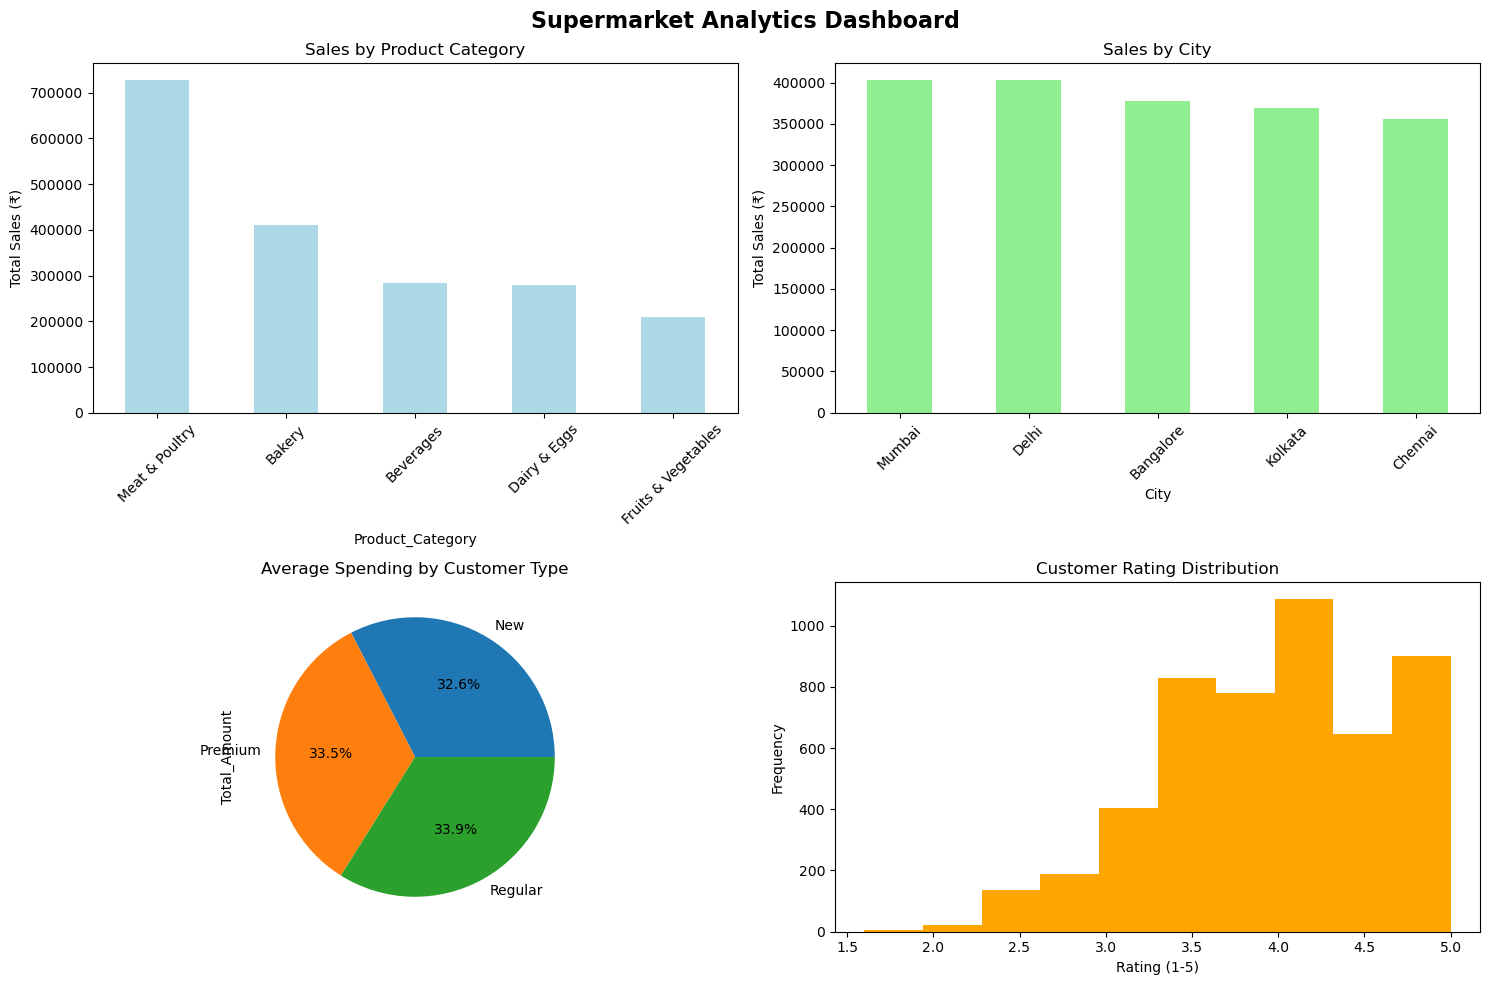


💡 BUSINESS INSIGHTS
📊 KEY METRICS:
   • Total Revenue: ₹1,910,068.44
   • Average Transaction Value: ₹382.01
   • Average Customer Rating: 4.0/5
   • Premium Customer Contribution: 30.5%

🎯 TOP PERFORMANCE INSIGHTS:
   • Best Category: Meat & Poultry (₹727,755.82)
   • Best City: Mumbai (₹403,136.24)
   1. Focus on expanding Meat & Poultry category
   2. Target Mumbai for marketing campaigns
   3. Increase premium customer benefits



In [5]:
# CORRECTED SUPERMARKET ANALYTICS PLATFORM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("🛒 INITIALIZING ADVANCED SUPERMARKET ANALYTICS PLATFORM...")
print("📊 This platform analyzes customer behavior and sales patterns!")

# FIXED: Advanced supermarket dataset
def create_supermarket_data():
    np.random.seed(42)
    n_transactions = 5000  # Reduced for faster testing
    
    categories = {
        'Dairy & Eggs': ['Milk', 'Eggs', 'Butter', 'Cheese', 'Yogurt'],
        'Fruits & Vegetables': ['Apples', 'Bananas', 'Tomatoes', 'Potatoes', 'Onions'],
        'Meat & Poultry': ['Chicken', 'Mutton', 'Fish', 'Eggs'],
        'Bakery': ['Bread', 'Cakes', 'Cookies', 'Buns'],
        'Beverages': ['Soft Drinks', 'Juices', 'Tea', 'Coffee']
    }
    
    cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata']
    payment_methods = ['Credit Card', 'Debit Card', 'Cash', 'UPI']
    customer_types = ['Regular', 'Premium', 'New']
    
    # FIXED: Better date generation
    dates = []
    for _ in range(n_transactions):
        year = 2023
        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        hour = np.random.randint(8, 22)
        minute = np.random.randint(0, 60)
        dates.append(f"{year}-{month:02d}-{day:02d} {hour:02d}:{minute:02d}")
    
    dates = pd.to_datetime(dates)
    
    print("🔄 Generating realistic supermarket transaction data...")
    
    data = {
        'Transaction_ID': [f"TXN{10000 + i}" for i in range(n_transactions)],
        'Date': dates,
        'Time': [d.strftime('%H:%M') for d in dates],  # FIXED: Convert to string
        'Day_Of_Week': [d.strftime('%A') for d in dates],
        'Month': [d.month for d in dates],
        'Season': [],
        'City': np.random.choice(cities, n_transactions),
        'Customer_Type': np.random.choice(customer_types, n_transactions, p=[0.6, 0.3, 0.1]),
        'Customer_Age': np.random.randint(18, 70, n_transactions),
        'Product_Category': [],
        'Product_Name': [],
        'Quantity': [],
        'Unit_Price': [],
        'Total_Amount': [],
        'Payment_Method': np.random.choice(payment_methods, n_transactions),
        'Rating_Given': []
    }
    
    # Generate product data
    for i in range(n_transactions):
        category = np.random.choice(list(categories.keys()))
        product = np.random.choice(categories[category])
        
        data['Product_Category'].append(category)
        data['Product_Name'].append(product)
        
        # Price based on category
        if category == 'Dairy & Eggs': base_price = np.random.uniform(20, 200)
        elif category == 'Fruits & Vegetables': base_price = np.random.uniform(10, 150)
        elif category == 'Meat & Poultry': base_price = np.random.uniform(100, 500)
        elif category == 'Bakery': base_price = np.random.uniform(15, 300)
        else: base_price = np.random.uniform(20, 200)
        
        quantity = np.random.randint(1, 5)
        total_amount = base_price * quantity
        
        data['Unit_Price'].append(round(base_price, 2))
        data['Quantity'].append(quantity)
        data['Total_Amount'].append(round(total_amount, 2))
        
        # Rating
        rating = max(1, min(5, np.random.normal(4.0, 0.7)))
        data['Rating_Given'].append(round(rating, 1))
        
        # Season
        month = data['Month'][i]
        if month in [12, 1, 2]: season = 'Winter'
        elif month in [3, 4, 5]: season = 'Spring'
        elif month in [6, 7, 8]: season = 'Summer'
        else: season = 'Fall'
        data['Season'].append(season)
    
    df = pd.DataFrame(data)
    print(f"✅ Generated dataset with {len(df)} transactions!")
    return df

# Create the dataset
print("\n" + "="*70)
supermarket_df = create_supermarket_data()

# Show dataset overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"Shape: {supermarket_df.shape}")
print(f"Total Revenue: ₹{supermarket_df['Total_Amount'].sum():,.2f}")
print(f"Average Transaction Value: ₹{supermarket_df['Total_Amount'].mean():.2f}")

# Quick Analysis
print(f"\n🛍️  TRANSACTION STATISTICS:")
print(f"Total Transactions: {len(supermarket_df)}")
print(f"Unique Customers Types: {supermarket_df['Customer_Type'].nunique()}")
print(f"Product Categories: {supermarket_df['Product_Category'].nunique()}")

# Category-wise performance
category_sales = supermarket_df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
print(f"\n📈 TOP PERFORMING CATEGORIES:")
print(category_sales.head())

# City-wise performance  
city_sales = supermarket_df.groupby('City')['Total_Amount'].sum().sort_values(ascending=False)
print(f"\n🏙️  CITY-WISE PERFORMANCE:")
print(city_sales)

# Simple Visualizations
print("\n" + "="*70)
print("📊 CREATING BASIC VISUALIZATIONS")
print("="*70)

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Supermarket Analytics Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Category Sales
category_sales.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Sales by Product Category')
axes[0,0].set_ylabel('Total Sales (₹)')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: City Performance
city_sales.plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Sales by City')
axes[0,1].set_ylabel('Total Sales (₹)')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: Customer Type Analysis
customer_analysis = supermarket_df.groupby('Customer_Type')['Total_Amount'].mean()
customer_analysis.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Average Spending by Customer Type')

# Plot 4: Rating Distribution
supermarket_df['Rating_Given'].plot(kind='hist', ax=axes[1,1], bins=10, color='orange')
axes[1,1].set_title('Customer Rating Distribution')
axes[1,1].set_xlabel('Rating (1-5)')

plt.tight_layout()
plt.show()

# Business Insights
print("\n" + "="*70)
print("💡 BUSINESS INSIGHTS")
print("="*70)

total_revenue = supermarket_df['Total_Amount'].sum()
avg_rating = supermarket_df['Rating_Given'].mean()
premium_customers = supermarket_df[supermarket_df['Customer_Type'] == 'Premium']['Total_Amount'].sum()
premium_contribution = (premium_customers / total_revenue) * 100

print(f"📊 KEY METRICS:")
print(f"   • Total Revenue: ₹{total_revenue:,.2f}")
print(f"   • Average Transaction Value: ₹{supermarket_df['Total_Amount'].mean():.2f}")
print(f"   • Average Customer Rating: {avg_rating:.1f}/5")
print(f"   • Premium Customer Contribution: {premium_contribution:.1f}%")

print(f"\n🎯 TOP PERFORMANCE INSIGHTS:")
print(f"   • Best Category: {category_sales.index[0]} (₹{category_sales.iloc[0]:,.2f})")
print(f"   • Best City: {city_sales.index[0]} (₹{city_sales.iloc[0]:,.2f})")



print(f"   1. Focus on expanding {category_sales.index[0]} category")
print(f"   2. Target {city_sales.index[0]} for marketing campaigns")
print(f"   3. Increase premium customer benefits")

print(f"\n" + "="*70)
print("="*70)